### Johansen Test

In order to test for cointegration of more than two variables, we need to use the Johansen test.To understand this test, let’s generalize Equation 2.1 to the case where the price variable $y(t)$ are actually vectors representing multiple price series, and the coefficients λ and α are actually matrices. (Because I do not think it is practical to allow for a constant drift in the price of a stationary portfolio, we will assume β*t* = 0 for simplicity.) Using English and Greek capital letters to represent vectors and matrices respectively, we can rewrite Equation 2.1 as

$$
ΔY(t) = ΛY(t − 1) + M + A_1ΔY(t − 1) + ... + A_k ΔY(t − k) + ε_t \;\;\;\;\; (2.7) 
$$

Just as in the univariate case, if $Λ = 0$, we do not have cointegration. (Recall that if the next move of *Y* doesn’t depend on the current price level, there can be no mean reversion.) Let’s denote the rank (remember this quaint linear algebraic term?) of $Λ$ as $r$, and the number of price series $n$*.* The number of independent portfolios that can be formed by various linear combinations of the cointegrating price series is equal to $r$*.* The Johansen test will calculate *r* for us in two different ways, both based on eigenvector decomposition of $Λ$. One test produces the so-called trace statistic, and other produces the eigen statistic. (A good exposition can be found in [Sorensen, 2005](https://www.uh.edu/~bsorense/gra_caus.pdf).) We need not worry what they are exactly, since the statsmodels package  will provide critical values for each statistic to allow us to test whether we can reject the null hypotheses that $r = 0$ (no cointegrating relationship), $r ≤ 1, ...,$ up to $r ≤ n – 1$. If all these hypotheses are rejected, then clearly we have $r = n$*.* As a useful by-product, the eigenvectors found can be used as our hedge ratios for the individual price series to form a stationary portfolio. We show how to run this test on the EWA-EWC pair in Example 2.7, where we find that the Johansen test confirms the CADF test’s conclusion that this pair is cointegrating. But, more interestingly, we add another ETF to the mix: IGE, an ETF consisting of natural resource stocks. We will see how many cointegrating relations can be found from these three price series. We also use the eigenvectors to form a stationary portfolio, and find out its half-life for mean reversion.

### Example 2.7: Using the Johansen Test for Cointegration

<Axes: xlabel='April 4, 2006, to April 9, 2012', ylabel='Share price $'>

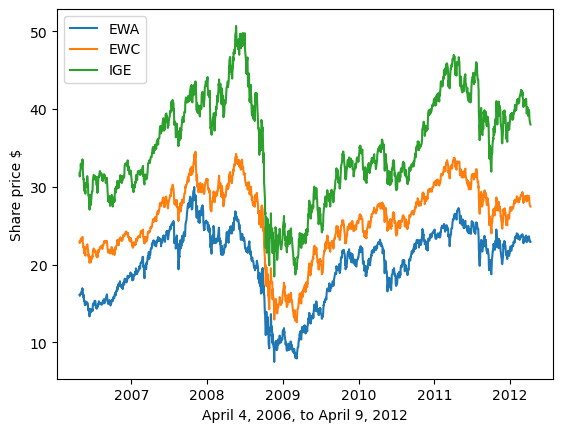

In [1]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.tsa.vector_ar.vecm as vm

df=pd.read_csv('inputData_EWA_EWC_IGE.csv')
df['Date']=pd.to_datetime(df['Date'],  format='%Y%m%d').dt.date # remove HH:MM:SS
df.set_index('Date', inplace=True)

df.plot(xlabel='April 4, 2006, to April 9, 2012', ylabel='Share price $')

**FIGURE 2.4** Share Prices of EWA versus EWC versus IGE

We take the EWA and EWC price series that we used in Example 2.6 and apply the Johansen test to them. There are three inputs to the johansen function of the statsmodels package: *endog*, *det_order*, and *k_ar_diffint*. *endog* is the input data, which should be a 2D array or DataFrame of shape (nobs, nseries) where nobs is the number of observations and nseries is the number of time series variables. As in the ADF and CADF tests, we set *det_order* = 0 to allow the Equation 2.7 to have a constant offset (M ≠ 0), but not a constant drift term $(β = 0)$. The input *k_ar_diffint* is the number of lags, which we again set to 1.

In [2]:
# Johansen test
result=vm.coint_johansen(df[['EWA', 'EWC']].values, det_order=0, k_ar_diff=1)
print(result.lr1)
print(result.cvt)
print(result.lr2)
print(result.cvm)

[19.98321869  3.98276124]
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
[16.00045745  3.98276124]
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


In [3]:
print('Johansen MLE estimates\n')
print('NULL:\t\tTrace Statistic\tCrit 90%\tCrit 95%\tCrit 99%')
print(f'r <= 0\tvariable 1\t{round(result.lr1[0], 3)}\t{result.cvt[0][0]}\t\t{result.cvt[0][1]}\t\t{result.cvt[0][2]}')
print(f'r <= 1\tvariable 2\t{round(result.lr1[1], 3)}\t{result.cvt[1][0]}\t\t{result.cvt[1][1]}\t\t{result.cvt[1][2]}\n')
print('NULL:\t\tEigen Statistic\tCrit 90%\tCrit 95%\tCrit 99%')
print(f'r <= 0\tvariable 1\t{round(result.lr2[0], 3)}\t{result.cvm[0][0]}\t\t{result.cvm[0][1]}\t\t{result.cvm[0][2]}')
print(f'r <= 1\tvariable 2\t{round(result.lr2[1], 3)}\t{result.cvm[1][0]}\t\t{result.cvm[1][1]}\t\t{result.cvm[1][2]}\n')

Johansen MLE estimates

NULL:		Trace Statistic	Crit 90%	Crit 95%	Crit 99%
r <= 0	variable 1	19.983	13.4294		15.4943		19.9349
r <= 1	variable 2	3.983	2.7055		3.8415		6.6349

NULL:		Eigen Statistic	Crit 90%	Crit 95%	Crit 99%
r <= 0	variable 1	16.0	12.2971		14.2639		18.52
r <= 1	variable 2	3.983	2.7055		3.8415		6.6349



We see that for the Trace Statistic test, the hypothesis $r = 0$ is rejected at the 99% level, and $r ≤ 1$ is rejected at the 95 percent level. The Eigen Statistic test concludes that hypothesis $r = 0$ is rejected at the 95 percent level, and $r ≤ 1$ is rejected at the 95 percent as well. This means that from both tests, we conclude that there are two cointegrating relationships between EWA and EWC.

What does it mean to have two cointegrating relations when we have only two price series? Isn’t there just one hedge ratio that will allocate capital between EWA and EWC to form a stationary
portfolio? Actually, no. Remember when we discussed the CADF test, we pointed out that it is order dependent. If we switched the role of the EWA from the independent to dependent variable, we may get a different conclusion. Similarly, when we use EWA as the dependent variable in a regression against EWC, we will get a different hedge ratio than when we use EWA as the independent variable. These two different hedge ratios, which are not necessarily reciprocal of each other, allow us to form two independent stationary portfolios. With the Johansen test, we do not need to run the regression two times to get those portfolios: Running it once will generate all the independent cointegrating relations that exist. The Johansen test, in other words, is independent of the order of the price series.

Now let us introduce another ETF to the portfolio: IGE, which consists of natural resource stocks. Assuming that its price series is contained in dataframe, we will run the Johansen test on all three price series to find out how many cointegrating relationships we can get out of this trio.

In [4]:
# Add IGE for Johansen test
result=vm.coint_johansen(df.values, det_order=0, k_ar_diff=1)
print(result.lr1)
print(result.cvt)
print(result.lr2)
print(result.cvm)

[34.42862022 17.53171895  4.47102054]
[[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
[16.89690127 13.06069841  4.47102054]
[[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


In [5]:
print('Johansen MLE estimates\n')
print('NULL:\t\tTrace Statistic\tCrit 90%\tCrit 95%\tCrit 99%')
print(f'r <= 0\tvariable 1\t{round(result.lr1[0], 3)}\t{result.cvt[0][0]}\t\t{result.cvt[0][1]}\t\t{result.cvt[0][2]}')
print(f'r <= 1\tvariable 2\t{round(result.lr1[1], 3)}\t{result.cvt[1][0]}\t\t{result.cvt[1][1]}\t\t{result.cvt[1][2]}')
print(f'r <= 2\tvariable 3\t{round(result.lr1[2], 3)}\t{result.cvt[2][0]}\t\t{result.cvt[2][1]}\t\t{result.cvt[2][2]}\n')
print('NULL:\t\tEigen Statistic\tCrit 90%\tCrit 95%\tCrit 99%')
print(f'r <= 0\tvariable 1\t{round(result.lr2[0], 3)}\t{result.cvm[0][0]}\t\t{result.cvm[0][1]}\t\t{result.cvm[0][2]}')
print(f'r <= 1\tvariable 2\t{round(result.lr2[1], 3)}\t{result.cvm[1][0]}\t\t{result.cvm[1][1]}\t\t{result.cvm[1][2]}')
print(f'r <= 2\tvariable 3\t{round(result.lr2[2], 3)}\t{result.cvm[2][0]}\t\t{result.cvm[2][1]}\t\t{result.cvm[2][2]}\n')

Johansen MLE estimates

NULL:		Trace Statistic	Crit 90%	Crit 95%	Crit 99%
r <= 0	variable 1	34.429	27.0669		29.7961		35.4628
r <= 1	variable 2	17.532	13.4294		15.4943		19.9349
r <= 2	variable 3	4.471	2.7055		3.8415		6.6349

NULL:		Eigen Statistic	Crit 90%	Crit 95%	Crit 99%
r <= 0	variable 1	16.897	18.8928		21.1314		25.865
r <= 1	variable 2	13.061	12.2971		14.2639		18.52
r <= 2	variable 3	4.471	2.7055		3.8415		6.6349



Both Trace statistic and Eigen statistic tests conclude that we should have three cointegrating relations with 95 percent certainty.

The eigenvalues and eigenvectors are contained in the arrays *results.eig* and *results.evec,* respectively.

In [6]:
print(result.eig) # eigenvalues
print(result.evec) # eigenvectors

[0.01121626 0.00868086 0.00298021]
[[ 0.7599635  -0.11204898  0.0789828 ]
 [-1.04602749 -0.5796762   0.26467204]
 [ 0.22330592  0.53159644 -0.09515547]]


Notice that the eigenvectors (represented as column vectors in *results.evec*) are ordered in decreasing order of their corresponding eigenvalues. So we should expect the first cointegrating relation to be the “strongest”; that is, have the shortest half-life for mean reversion. Naturally, we pick this eigenvector to form our stationary portfolio (the eigenvector determines the shares of each ETF), and we can find its half-life by the same method as before when we were dealing with a stationary price series. The only difference is that we now have to compute the T × 1 array *yport*, which represents the net market value (price) of the portfolio, which is equal to the number of shares of each ETF multiplied by the share price of each ETF, then summed over all ETFs. *yport* takes the role of y in Example 2.4.

In [7]:
# (net) market value of portfolio
yport=pd.DataFrame(np.dot(df.values, result.evec[:, 0]))

ylag=yport.shift()
deltaY=yport-ylag
df2=pd.concat([ylag, deltaY], axis=1)
df2.columns=['ylag', 'deltaY']
# Note this can deal with NaN in top row
regress_results=sm.ols(formula="deltaY ~ ylag", data=df2).fit()
print(regress_results.params)

halflife=-np.log(2)/regress_results.params['ylag']
print('halflife = %f days' % halflife)

Intercept   -0.115768
ylag        -0.030586
dtype: float64
halflife = 22.662578 days


The half-life of 23 days is considerably shorter than the 115 days for USD.CAD, so we expect a mean reversion trading strategy to work better for this triplet.